In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
data = pd.read_csv("D:/Documentos/16-01 2025/Análisis de datos/Tarea 3/winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [10]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

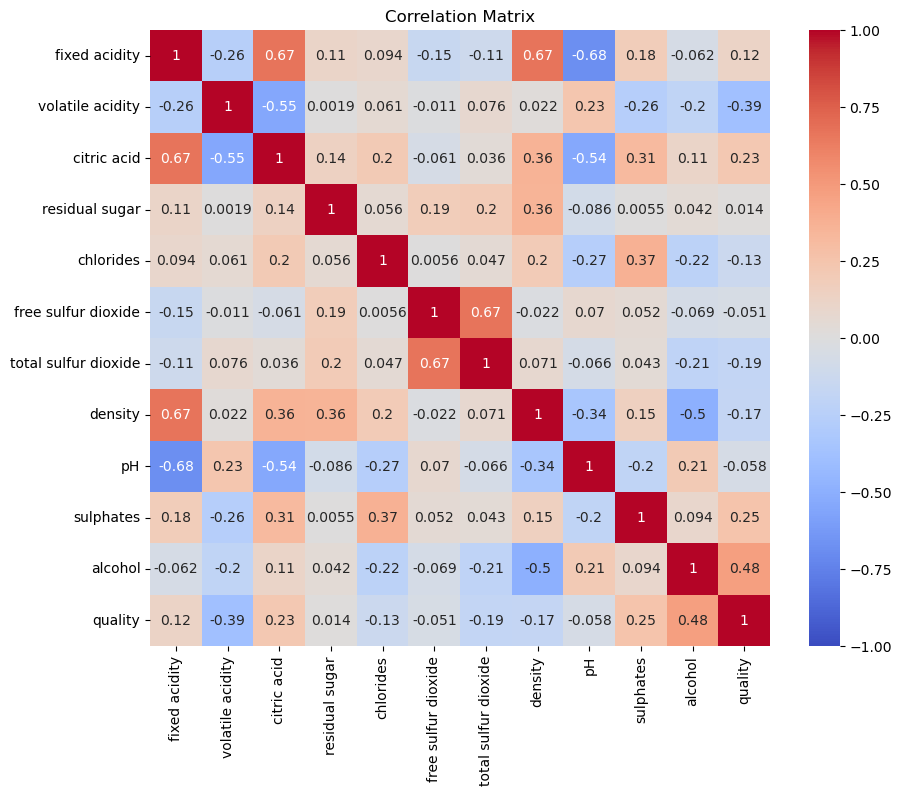

In [12]:
correlation_matrix = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [17]:
quality_correlation = correlation_matrix['quality'].sort_values(ascending=False)
print(quality_correlation)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


In [21]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

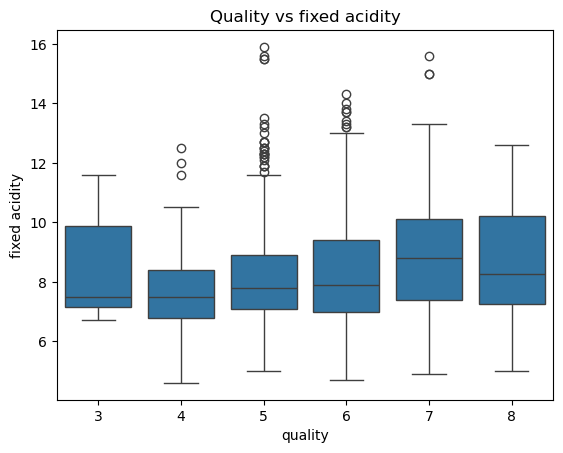

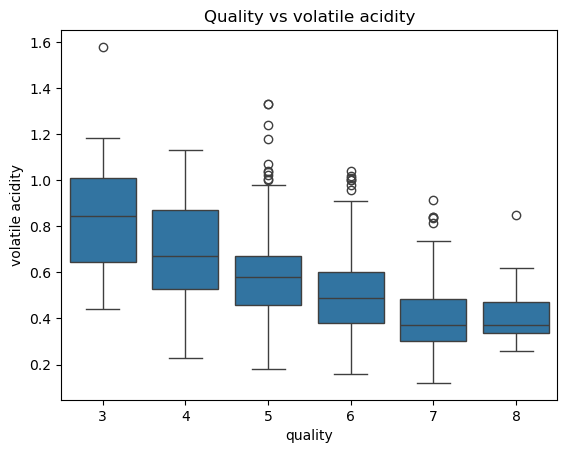

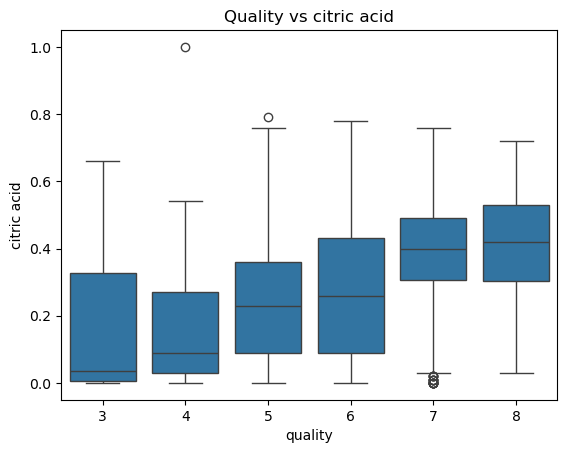

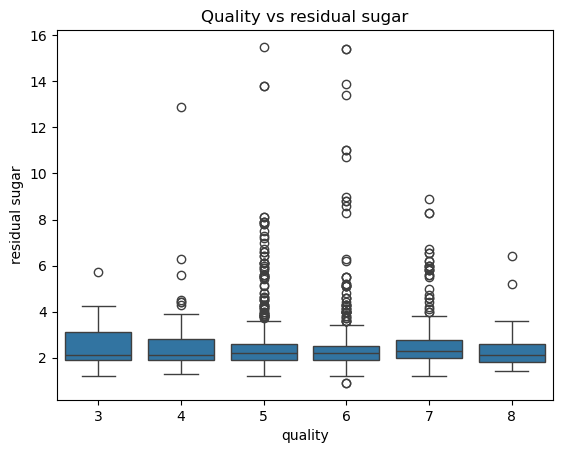

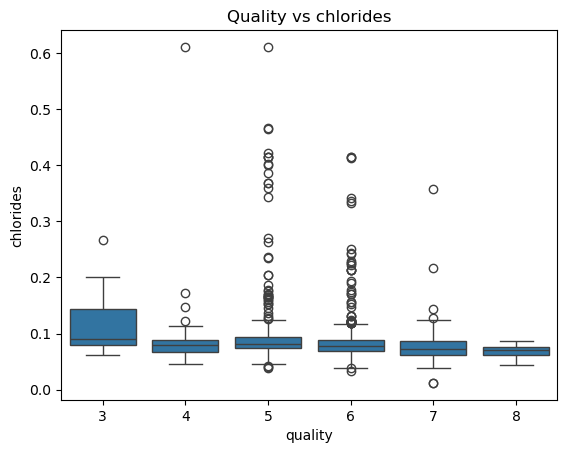

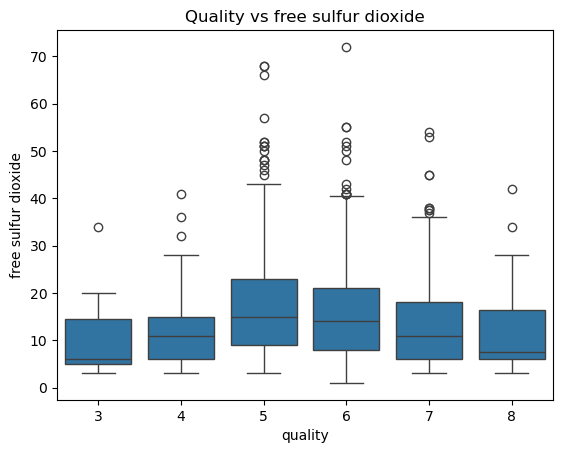

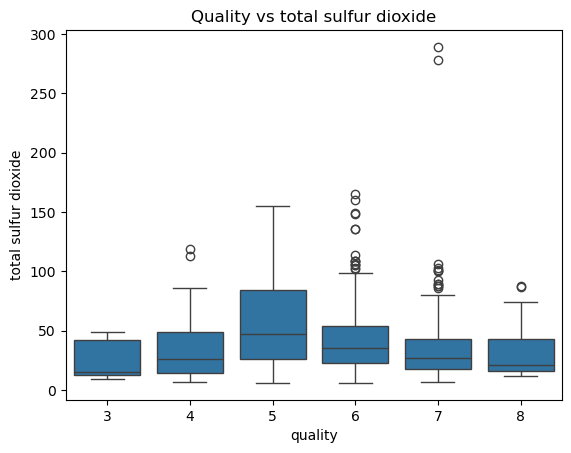

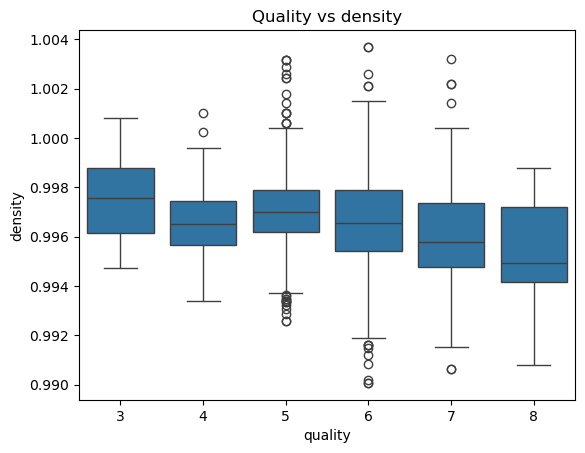

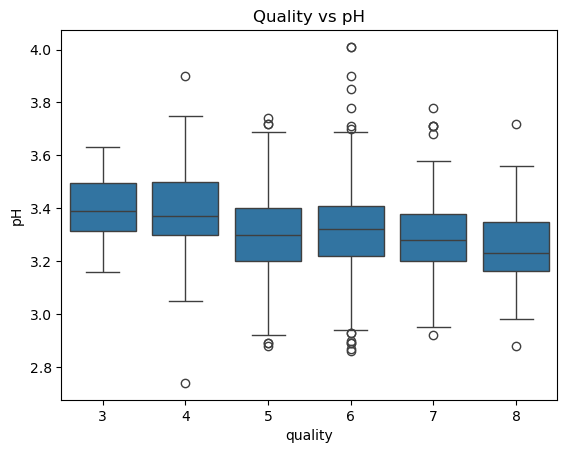

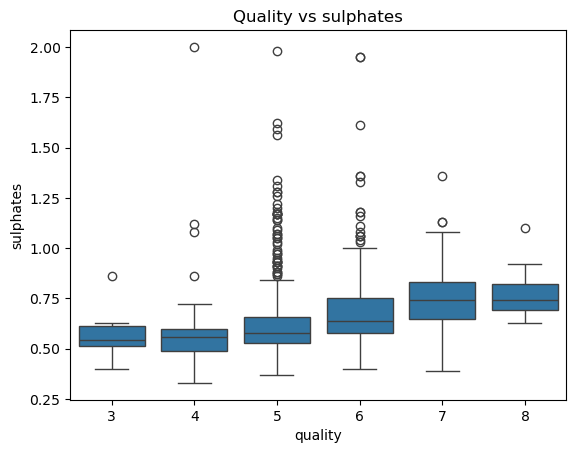

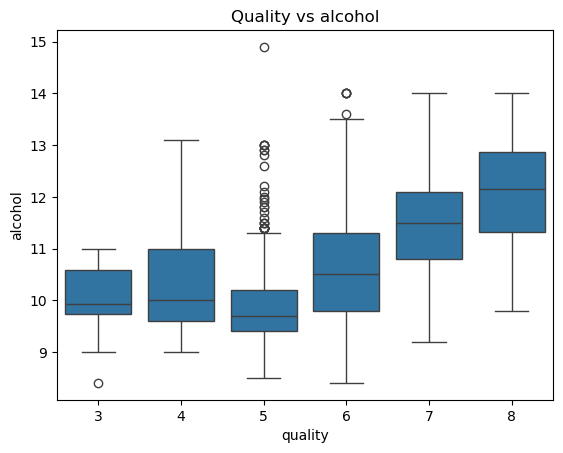

In [27]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

for col in cols:
    sns.boxplot(data=data, x='quality', y=col )
    plt.title(f'Quality vs {col}')
    plt.show()

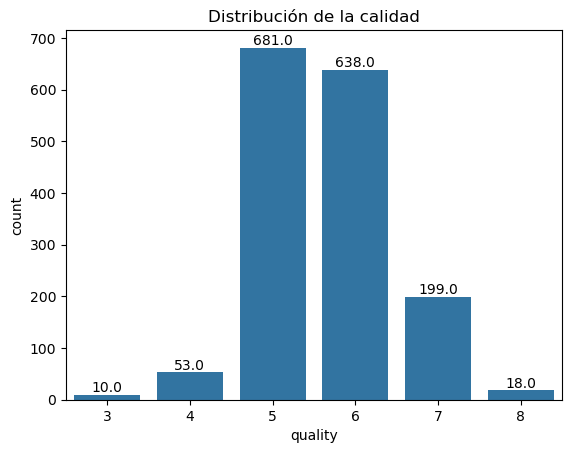

In [33]:
ax = sns.countplot(x='quality', data=data)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0,5),
                textcoords='offset points')

plt.title('Distribución de la calidad')
plt.show()
    

In [35]:
data_log =data.copy()

for col in cols:
    data_log[col] = np.log1p(data_log[col])

In [37]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [39]:
data_log.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.128232,0.530628,0.000000,1.064711,0.073250,2.484907,3.555348,0.692047,1.506297,0.444686,2.341806,5
1,2.174752,0.631272,0.000000,1.280934,0.093490,3.258097,4.219508,0.691546,1.435085,0.518794,2.379546,5
2,2.174752,0.565314,0.039221,1.193922,0.088011,2.772589,4.007333,0.691646,1.449269,0.500775,2.379546,5
3,2.501436,0.246860,0.444686,1.064711,0.072321,2.890372,4.110874,0.692147,1.425515,0.457425,2.379546,6
4,2.128232,0.530628,0.000000,1.064711,0.073250,2.484907,3.555348,0.692047,1.506297,0.444686,2.341806,5


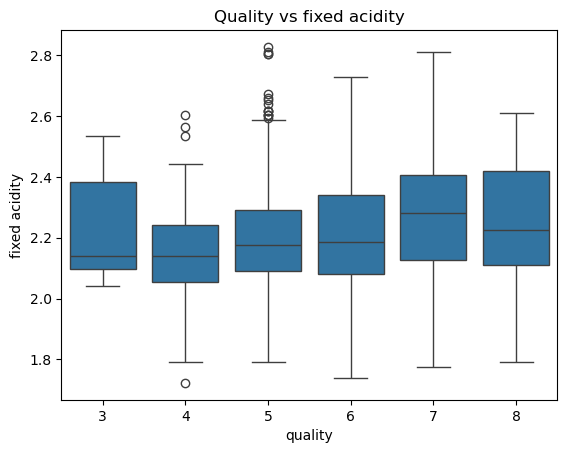

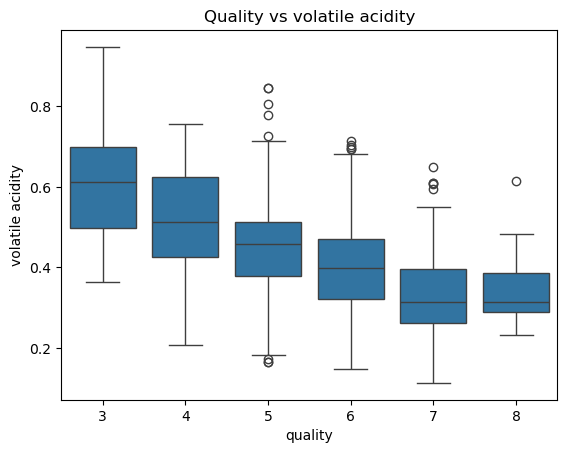

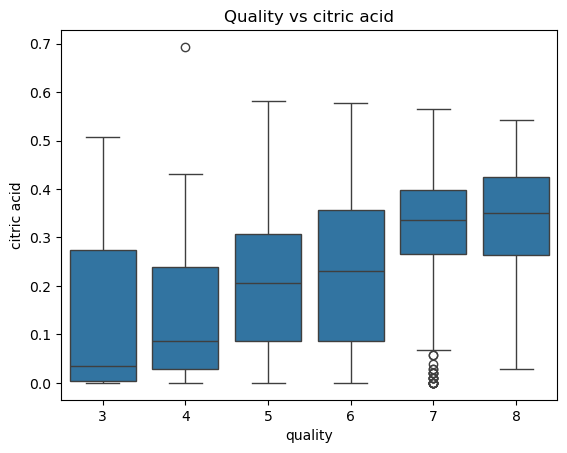

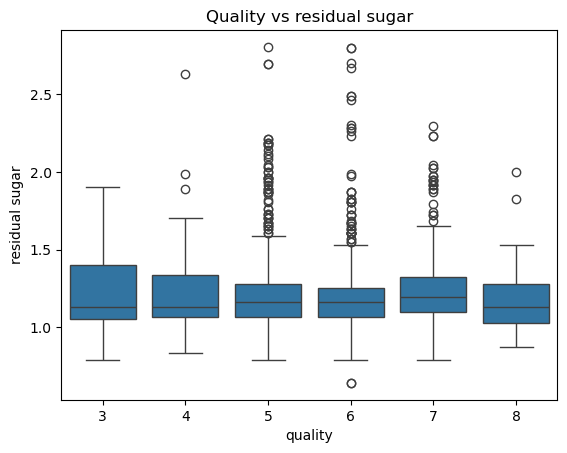

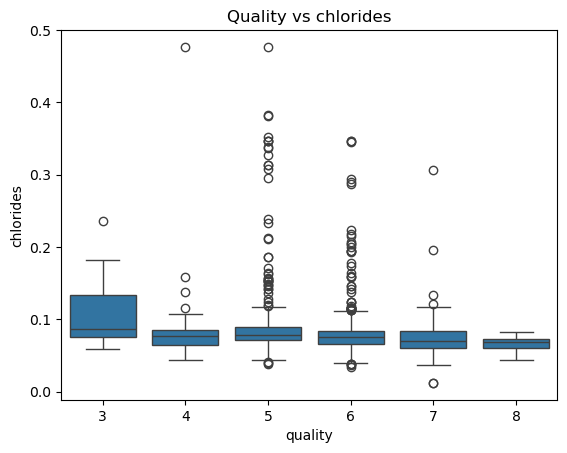

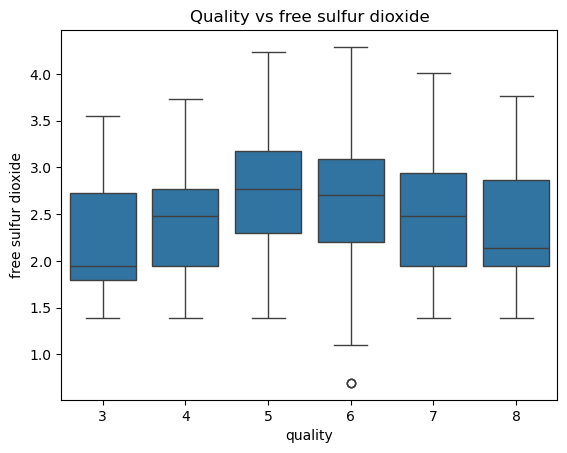

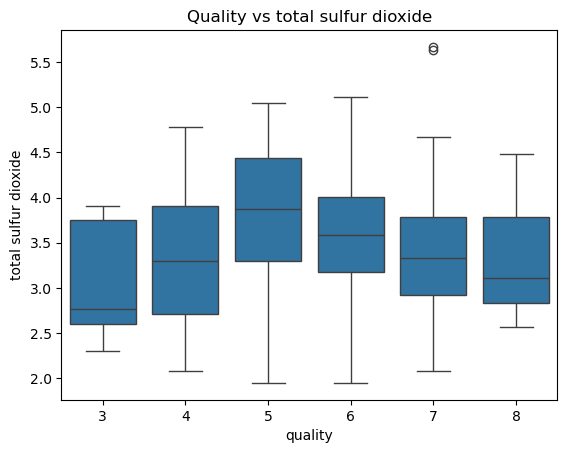

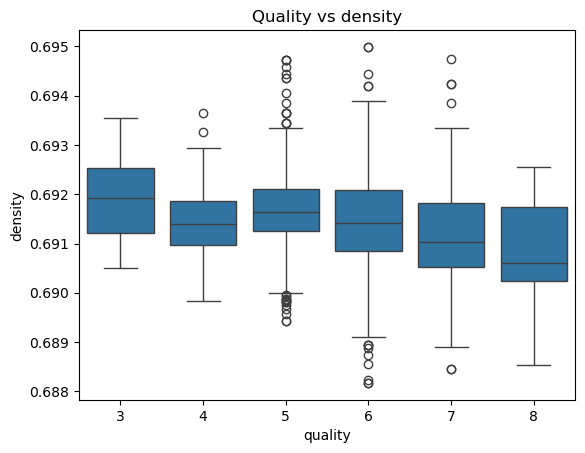

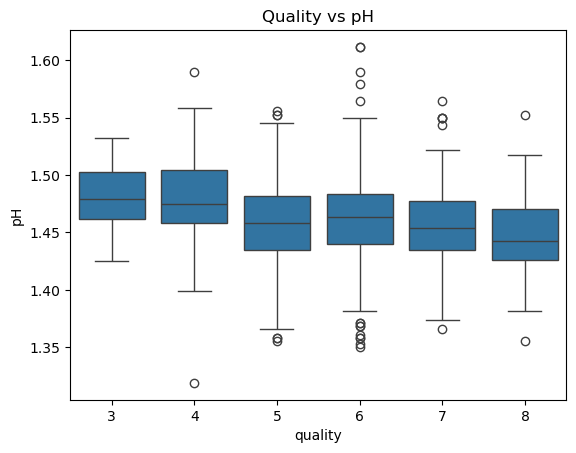

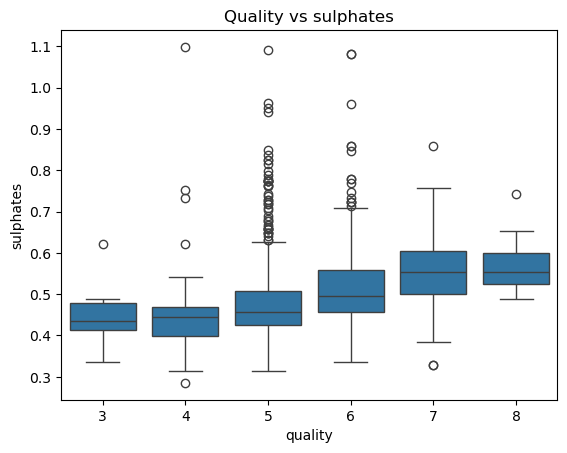

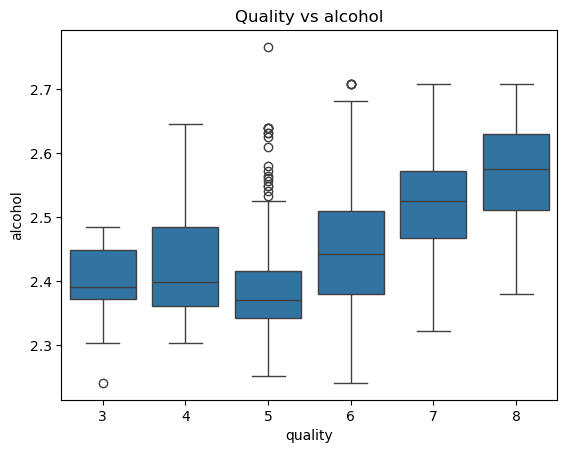

In [41]:
for col in cols:
    sns.boxplot(data=data_log, x='quality', y=col )
    plt.title(f'Quality vs {col}')
    plt.show()

In [73]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

selector = SelectKBest(k=8)  
X_new = selector.fit_transform(X, y)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42, stratify=y)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = data.drop('quality', axis=1)
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(y_train.value_counts())
print(y_test.value_counts())

quality
5    551
6    506
7    157
4     43
8     13
3      9
Name: count, dtype: int64
quality
6    132
5    130
7     42
4     10
8      5
3      1
Name: count, dtype: int64


In [53]:
model_col = []

for col in cols:
    model_col.append(col)
    model = RandomForestClassifier(random_state=0)
    model.fit(X_train[model_col], y_train)
    y_pred = model.predict(X_test[model_col])
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Precisión con {model_col}: {accuracy}')

Precisión con ['fixed acidity']: 0.4
Precisión con ['fixed acidity', 'volatile acidity']: 0.53125
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid']: 0.553125
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']: 0.55625
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides']: 0.565625
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide']: 0.59375
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide']: 0.628125
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density']: 0.625
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH']: 0.640625
Pre

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(y_train.value_counts())
print(y_test.value_counts())

quality
5    545
6    510
7    159
4     42
8     15
3      8
Name: count, dtype: int64
quality
5    136
6    128
7     40
4     11
8      3
3      2
Name: count, dtype: int64


In [57]:
model_col = []

for col in cols:
    model_col.append(col)
    model = RandomForestClassifier(random_state=0)
    model.fit(X_train[model_col], y_train)
    y_pred = model.predict(X_test[model_col])
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Precisión con {model_col}: {accuracy}')

Precisión con ['fixed acidity']: 0.434375
Precisión con ['fixed acidity', 'volatile acidity']: 0.571875
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid']: 0.58125
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']: 0.6
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides']: 0.6
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide']: 0.63125
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide']: 0.640625
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density']: 0.66875
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH']: 0.6375
Precisi

In [59]:
X = data_log.drop('quality', axis=1)
y = data_log['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
for col in cols:
    model_col.append(col)
    model = RandomForestClassifier(random_state=0)
    model.fit(X_train[model_col], y_train)
    y_pred = model.predict(X_test[model_col])
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Precisión con {model_col}: {accuracy}')

Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'fixed acidity']: 0.66875
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'fixed acidity', 'volatile acidity']: 0.690625
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'fixed acidity', 'volatile acidity', 'citric acid']: 0.675
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']: 0.678125
Precisión con ['fixed acidity', 'volatile ac

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

for col in cols:
    model_col.append(col)
    model = RandomForestClassifier(random_state=0)
    model.fit(X_train[model_col], y_train)
    y_pred = model.predict(X_test[model_col])
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Precisión con {model_col}: {accuracy}')

Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'fixed acidity']: 0.659375
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'fixed acidity', 'volatile acidity']: 0.68125
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'fixed acidity', 'volatile 

In [65]:
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(k=8)  # Selecciona las 8 mejores características
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

In [67]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [ ]:
# **Modelo y Evaluación**
# Se construye un modelo RandomForest para predecir la calidad del vino en función de sus características. La precisión se evalúa utilizando diferentes combinaciones de características.

# Imprimir la precisión para la iteración anterior

# **Estratificación**
# Se repite el proceso anterior con estratificación para asegurar una distribución equilibrada de las clases en los conjuntos de entrenamiento y prueba.
# Imprimir la precisión para la iteración anterior

# ***
# ***Documentación de Resultados***
#
#
### **Análisis de la Distribución de Clases**
#
# La distribución de las clases en los conjuntos de entrenamiento y prueba muestra que algunas clases (e.g., 3 y 8) tienen muy pocos ejemplos. La estratificación ayuda a mantener la proporción de estas clases minoritarias en ambos conjuntos.
#
### **Importancia de las Características**
#
# Al iterar sobre las columnas y construir modelos con diferentes combinaciones, podemos observar que algunas características tienen un mayor impacto en la precisión del modelo que otras. En general, las primeras características añadidas (como 'fixed acidity', 'volatile acidity', y 'citric acid') tienden a aumentar la precisión más que las características añadidas posteriormente.
#
### **Efecto de la Transformación Logarítmica**
#
# Los boxplots de las variables transformadas logarítmicamente permiten visualizar cómo esta transformación afecta la distribución de los datos y su relación con la variable objetivo. En general, la transformación logarítmica puede ayudar a reducir la asimetría de los datos y mejorar el rendimiento del modelo.
#
### **Consideraciones Finales**
#
# En este análisis, se exploraron diferentes aspectos del dataset y se construyeron modelos RandomForest para predecir la calidad del vino. Los resultados sugieren que algunas características son más importantes que otras y que la estratificación puede ayudar a mejorar la generalización del modelo.
#
### **Próximos Pasos**
#
# 1. **Selección de Características Formal:**
#      *Utilizar métodos de selección de características más sofisticados (e.g., SelectKBest, Recursive Feature Elimination) para identificar las características más relevantes de manera más sistemática.
# 2. **Ajuste de Hiperparámetros:**
#      *Optimizar los hiperparámetros del modelo RandomForest (e.g., número de árboles, profundidad máxima) utilizando técnicas como GridSearchCV o RandomizedSearchCV.
# 3. **Evaluación con Métricas Múltiples:**
#     *Evaluar el modelo utilizando métricas adicionales (e.g., precisión, recall, F1-score, AUC-ROC) para obtener una visión más completa de su rendimiento.
# 4. **Validación Cruzada:**
#    *Implementar la validación cruzada para evaluar la estabilidad del modelo y reducir el riesgo de overfitting.
# 5. **Explorar Otros Modelos:**
#   *Considerar otros algoritmos de clasificación (e.g., Gradient Boosting, Support Vector Machines) y comparar su rendimiento con el del RandomForest.